In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Demo_df_Processed = pd.DataFrame(np.random.randint(-2100,-2000,size=(100, 4)), columns=list('ABCD'))
Demo_df_Processed = Demo_df_Processed.append(pd.DataFrame(np.random.randint(-600,-500,size=(100, 4)), columns=list('ABCD')))
Demo_df_Processed = Demo_df_Processed.append(pd.DataFrame(np.random.randint(500,600,size=(100, 4)), columns=list('ABCD')))
Demo_df_Processed = Demo_df_Processed.append(pd.DataFrame(np.random.randint(2000,2100,size=(100, 4)), columns=list('ABCD')))


In [3]:
def perform_PCA(n_compoments, X):
    pca_ = PCA(n_components=n_compoments)
    X_pca = pca_.fit_transform(X)
    
    print('eigenvectors: ', pca.components_)
    print('singular values: ', pca.singular_values_)
    print('normalized cumulative sum of eigenvalues: ', pca.explained_variance_ratio_)
    print(' mean vector: ', pca.mean_)
    
    return X_pca

In [8]:
X_pca = perform_PCA(3, Demo_df_Processed)

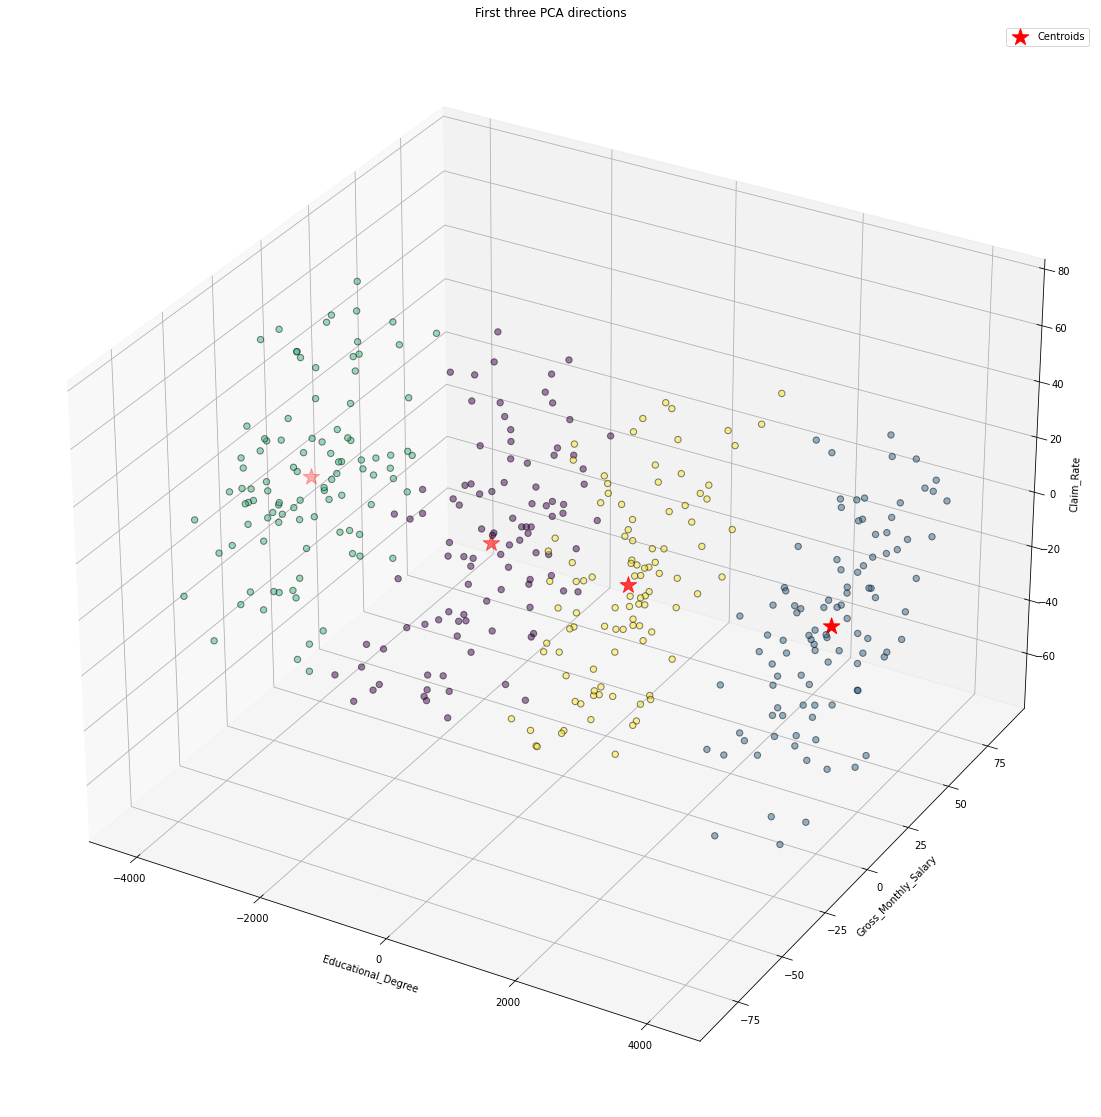

In [15]:
def kmeans_clustering(X, nclusters):
    kmeans= KMeans(n_clusters=nclusters, init='k-means++', max_iter= 500, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X)

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X[:,0],X[:,1],X[:,2], c=y_kmeans, edgecolor='k', s=40, alpha = 0.5)

    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
               s = 300, c = 'r', marker='*', label = 'Centroids')

    plt.legend()
    ax.set_title("First three PCA directions")
    ax.set_xlabel("Educational_Degree")
    ax.set_ylabel("Gross_Monthly_Salary")
    ax.set_zlabel("Claim_Rate")

    plt.autoscale(enable=True, axis='x', tight=True)    

    plt.show()
    
kmeans_clustering(X_pca, 4)